In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

features = pd.read_csv("C:/Users/TFG155/Desktop/인공지능개론/데이터/abalone.data", index_col = None, header = None)
features

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [2]:
features.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [3]:
X = features.iloc[:,[1,2,3,4,5,6]].values
y = features.iloc[:,7].values

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

In [4]:
X

array([[0.455 , 0.365 , 0.095 , 0.514 , 0.2245, 0.101 ],
       [0.35  , 0.265 , 0.09  , 0.2255, 0.0995, 0.0485],
       [0.53  , 0.42  , 0.135 , 0.677 , 0.2565, 0.1415],
       ...,
       [0.6   , 0.475 , 0.205 , 1.176 , 0.5255, 0.2875],
       [0.625 , 0.485 , 0.15  , 1.0945, 0.531 , 0.261 ],
       [0.71  , 0.555 , 0.195 , 1.9485, 0.9455, 0.3765]])

In [5]:
y

array([0.15 , 0.07 , 0.21 , ..., 0.308, 0.296, 0.495])

In [6]:
import numpy as np
# 평균

mean = np.mean(X_train, axis = 0)

# 표준편차
std = np.std(X_train, axis = 0) # 표준편차값

# 표준화값
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (6,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


In [8]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
105/105 [==============================] - 1s 4ms/step - loss: 0.0063 - mse: 0.0063 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 2/100
105/105 [==============================] - 0s 2ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 3/100
105/105 [==============================] - 0s 2ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 4/100
105/105 [==============================] - 0s 2ms/step - loss: 0.0020 - mse: 0.0020 - val_loss: 8.1123e-04 - val_mse: 8.1123e-04
Epoch 5/100
105/105 [==============================] - 0s 2ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 8.9710e-04 - val_mse: 8.9710e-04
Epoch 6/100
105/105 [==============================] - 0s 3ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 7/100
105/105 [==============================] - 0s 3ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 8/100
105/105 [==============================] 

In [9]:
model.evaluate(X_test, y_test)

27/27 [==============================] - 0s 2ms/step - loss: 6.8032e-04 - mse: 6.8032e-04


[0.0006803181022405624, 0.0006803181022405624]

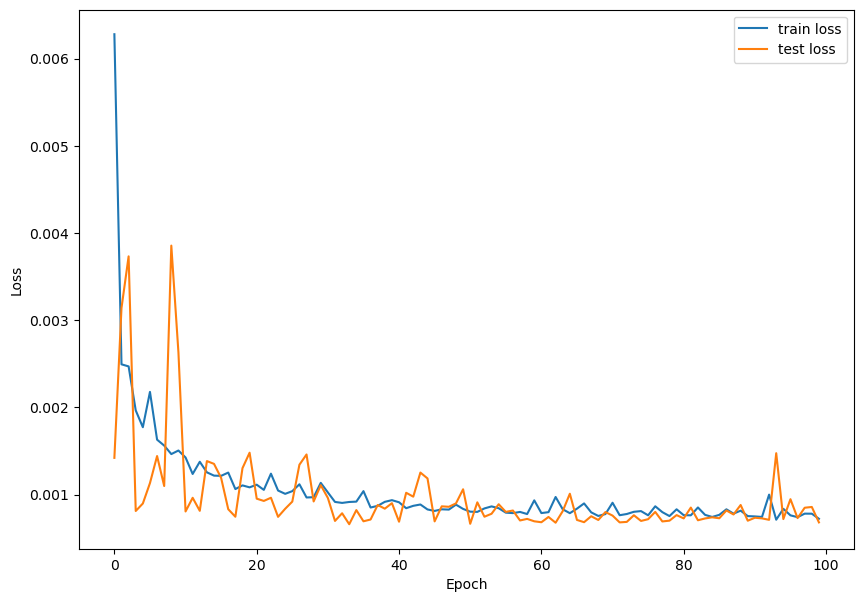

In [10]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

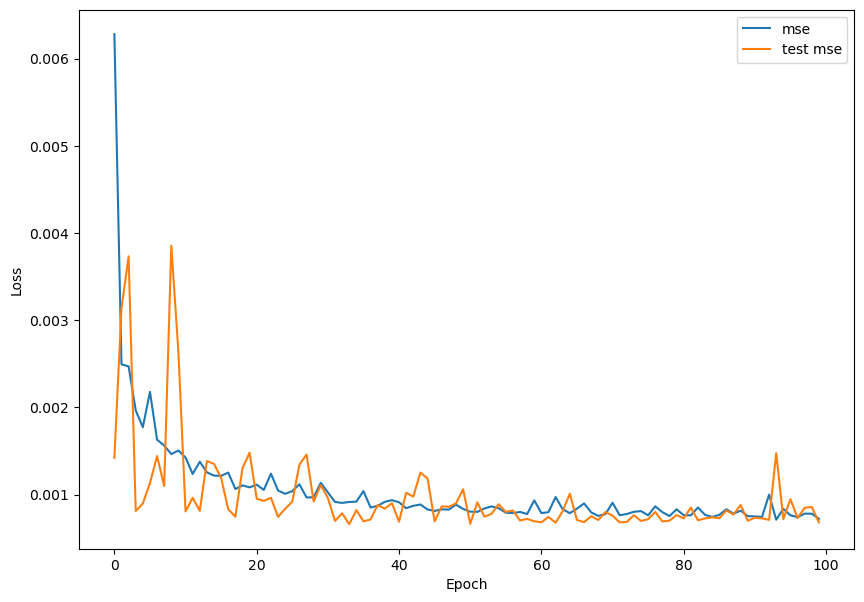

In [11]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()